In [8]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

Selecting as resources just Omnipath

In [9]:
omnipath = op.interactions.OmniPath().get()

First set the folder for input and output

In [10]:
data_folder = "../../data/"

figures_folder = "../../Figures/"

sif_output = "../../sif_files/"

Loading the data from Antoine

In [11]:
data = pd.read_csv(data_folder + "discrete_data.csv")

In [12]:
data.fillna("", inplace=True)
data.reset_index(drop=True, inplace=True)

In [13]:
data

,WNT,SHH,Group 3,Group 4,WNT and Group 3,SHH and Group 3,Group 3 and Group 4,WNT and Group 3 and Group 4,WNT and SHH and Group 3 and Group 4
0,CSNK2B,DMRTA1,GABRA5,POU2F1,SMARCA4,TGFBR1,CHD7,LHX2,ZIC1
1,LEF1,BCOR,IMPG2,LHX1,,,KDM5A,,ZIC4
2,TP53,SMO,ANPRC,SIX2,,,KDM4C,,
3,PAX3,NHLH1,RARX2,LHX5,,,ZMYM3,,
4,HOXDB13,YAP1,MYC,ZNF35,,,EZH2,,
5,CTNNB1,LDB1,CRX,BARHL1,,,KDM6A,,
6,NKD2,PCNT,LIN28B,MLL3,,,KDM1A,,
7,NKD1,NFATC1,GBRA5,STAT5A,,,KDM3A,,
8,ONECUT2,SOX13,SMAD9,UNCX,,,KDM7A,,
9,EMX2,SUFU,LHX9,MYCN,,,KDM5B,,


Selecting just Group 3 group

In [14]:
group3_list = set()

for column in data.columns:
    if "Group 3" in column: 
        group3_list = group3_list.union(set(data[column].replace({"":None}).dropna()))   

print(group3_list)

{'LHX9', 'EZH2', 'KDM7A', 'ANPRC', 'IRX8', 'TGFBR1', 'KDM1A', 'KDM3A', 'IMPG2', 'LIN28B', 'CHD7', 'CRX', 'GABRA3', 'GABRA5', 'ATP10A', 'ZIC4', 'RARX2', 'GBRA5', 'MYC', 'SMAD9', 'HLX', 'KDM5A', 'KDM4C', 'KDM5B', 'LHX2', 'ZIC1', 'KDM6A', 'ZMYM3', 'SMARCA4'}


# Creating a Network starting from All Omnipath interactions

In [15]:
group3_net = Network(group3_list, resources = omnipath)

Error: node LHX9 is not present in the resources database
Error: node IRX8 is not present in the resources database
Error: node CHD7 is not present in the resources database
Error: node ATP10A is not present in the resources database
Error: node ZIC4 is not present in the resources database
Error: node RARX2 is not present in the resources database
Error: node GBRA5 is not present in the resources database
Error: node HLX is not present in the resources database


Adding the node that were not found manually: GBRA5 --> GABRA5

In [30]:
group3_net.add_node("GABRA5")

In [32]:
group3_net.nodes

,Genesymbol,Uniprot,Type
0,EZH2,Q15910,NaN
1,KDM7A,Q6ZMT4,NaN
2,NPR3,P17342,NaN
3,TGFBR1,P36897,NaN
4,KDM1A,O60341,NaN
5,KDM3A,Q9Y4C1,NaN
6,IMPG2,Q9BZV3,NaN
7,LIN28B,Q6ZN17,NaN
8,CRX,O43186,NaN
9,GABRA3,P34903,NaN


In [33]:
group3_net.complete_connection(maxlen=6, k_mean="extensive", only_signed=True, connect_node_when_first_introduced=True, consensus=True)

In [34]:
group3_net.nodes

,Genesymbol,Uniprot,Type
0,EZH2,Q15910,NaN
1,KDM7A,Q6ZMT4,NaN
2,NPR3,P17342,NaN
3,TGFBR1,P36897,NaN
4,KDM1A,O60341,NaN
...,...,...,...
64,MIR17HG,Q75NE6,NaN
65,BMPR2,Q13873,NaN
66,BMPR1A,P36894,NaN
67,BMPR1B,O00238,NaN


In [35]:
group3_net.edges

,source,target,Type,Effect,References
0,Q6ZMT4,P10275,None,stimulation,SPIKE:17277772;SPIKE_LC:17277772
1,P10275,P00533,None,stimulation,CancerCellMap:12534934;Cellinker:15288768;HPRD...
2,P00533,Q01094,None,stimulation,SPIKE:16299810;SPIKE_LC:16299810
3,Q01094,Q15910,None,stimulation,ACSN:14532106;SPIKE:14532106;SPIKE:18319725;SP...
4,P10275,P38936,None,stimulation,SPIKE:10076995;SPIKE_LC:10076995
...,...,...,...,...,...
180,Q9HCE7,Q13873,None,inhibition,SIGNOR:17317136;SIGNOR:22298955
181,Q9HCE7,P36894,None,inhibition,SIGNOR:17317136;SIGNOR:22298955
182,P36894,O00238,None,stimulation,HPRD:10712517;SIGNOR:10712517
183,P06400,P25490,None,inhibition,SPIKE:11118439;SPIKE:12588874;SPIKE_LC:1111843...


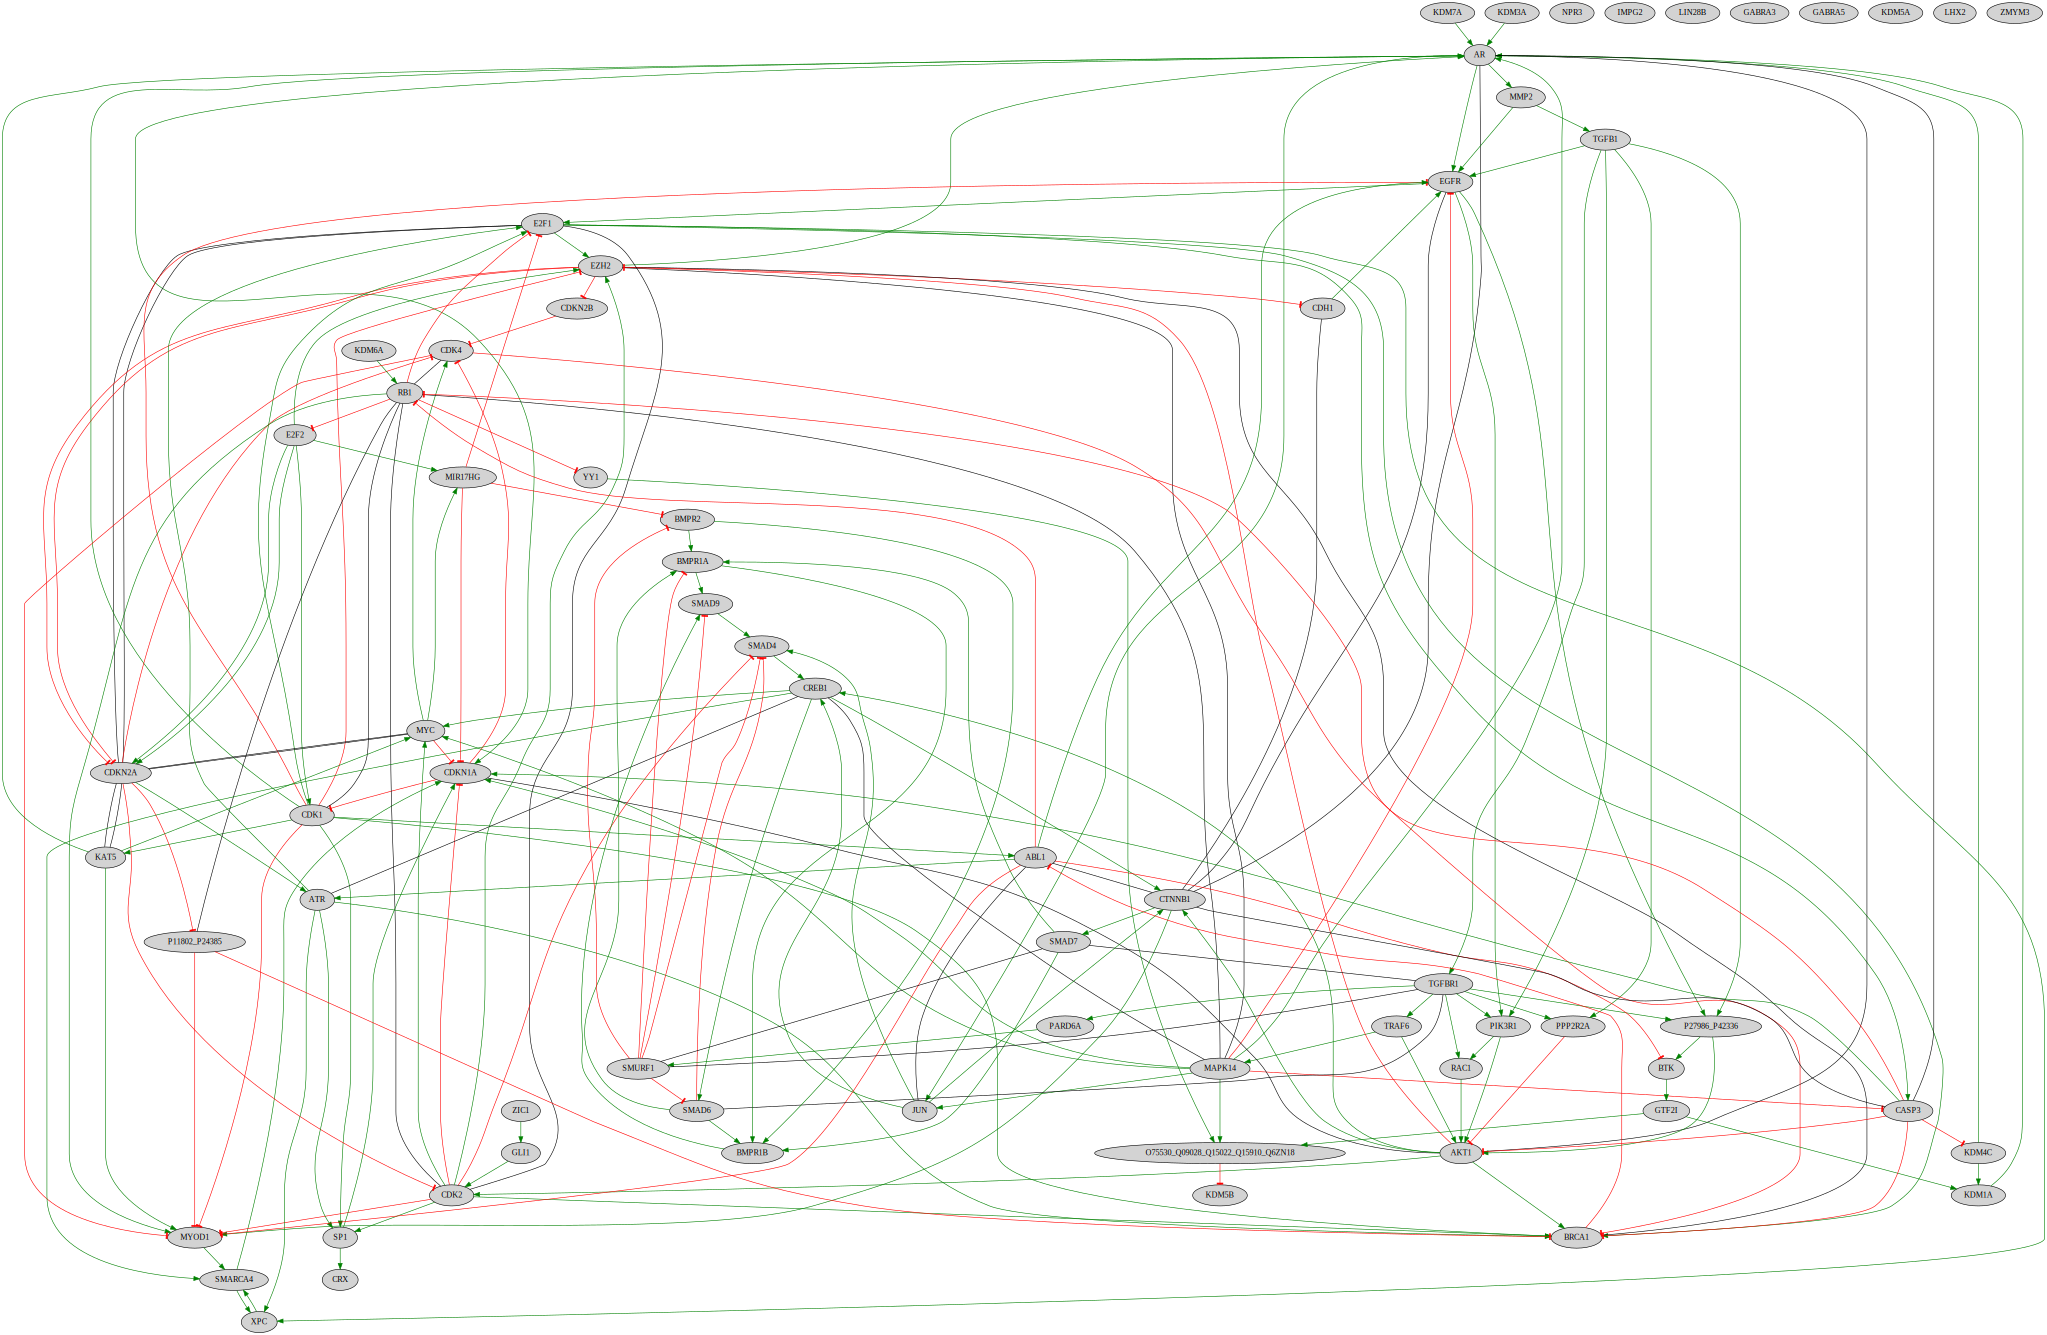

In [36]:
group3_visualizer = NetworkVisualizer(group3_net,color_by='effect')
output = figures_folder + "Group3/Group3_all_omnipath"
group3_visualizer.render(output_file=output)

# Exporting Network in sif file

In [37]:
from neko._outputs.exports import Exports

In [56]:
for node in group3_net.nodes["Uniprot"]:
    if group3_net.edges[group3_net.edges["source"].isin([node])].empty and group3_net.edges[group3_net.edges["target"].isin([node])].empty:
        print(group3_net.nodes[group3_net.nodes["Uniprot"] == node])
        group3_net.remove_node(node)

  Genesymbol Uniprot Type
2       NPR3  P17342  NaN
  Genesymbol Uniprot Type
6      IMPG2  Q9BZV3  NaN
  Genesymbol Uniprot Type
7     LIN28B  Q6ZN17  NaN
  Genesymbol Uniprot Type
9     GABRA3  P34903  NaN
   Genesymbol Uniprot Type
10     GABRA5  P31644  NaN
   Genesymbol Uniprot Type
13      KDM5A  P29375  NaN
   Genesymbol Uniprot Type
16       LHX2  P50458  NaN
   Genesymbol Uniprot Type
19      ZMYM3  Q14202  NaN


In [57]:
export = Exports(group3_net)

In [58]:
export.export_sif(sif_output + "Group3_all_omnipath.sif")